# CUSTOMER CHURN ANALYSIS AND PREDICTION

## Code: Importing Telco Churn dataset

In [10]:
# Import required libraries 
import numpy as np 
import pandas as pd 

# Import the dataset 
dataset = pd.read_csv(r'C:\Users\Sri Vaishnavi\OneDrive\Documents\Customer-churn\churn-bigml-80.csv') 

# Glance at the first five records 
dataset.head() 

# Print all the features of the data 
dataset.columns 


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

## Exploratory Data Analysis on Telco Churn Dataset
### Code : To find the number of churners and non-churners in the dataset:

In [16]:
# Churners vs Non-Churners 
dataset['Churn'].value_counts() 

Churn
False    2278
True      388
Name: count, dtype: int64

## Code: To group data by Churn and compute the mean to find out if churners make more customer service calls than non-churners:

In [17]:
# Group data by 'Churn' and compute the mean 
print(dataset.groupby('Churn')['Customer service calls'].mean()) 


Churn
False    1.453029
True     2.206186
Name: Customer service calls, dtype: float64


## Code: To find out if one State has more churners compared to another.

In [18]:
# Count the number of churners and non-churners by State 
print(dataset.groupby('State')['Churn'].value_counts()) 


State  Churn
AK     False    40
       True      3
AL     False    59
       True      7
AR     False    36
                ..
WI     True      4
WV     False    81
       True      7
WY     False    58
       True      8
Name: count, Length: 102, dtype: int64


## Exploring Data Visualizations : To understand how variables are distributed.

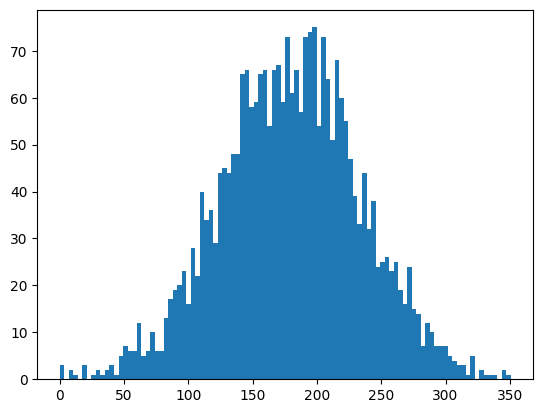

In [22]:
# Import matplotlib and seaborn 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Visualize the distribution of 'Total day minutes' 
plt.hist(dataset['Total day minutes'], bins = 100) 

# Display the plot 
plt.show() 

## Code: To visualize the difference in Customer service calls between churners and non-churners

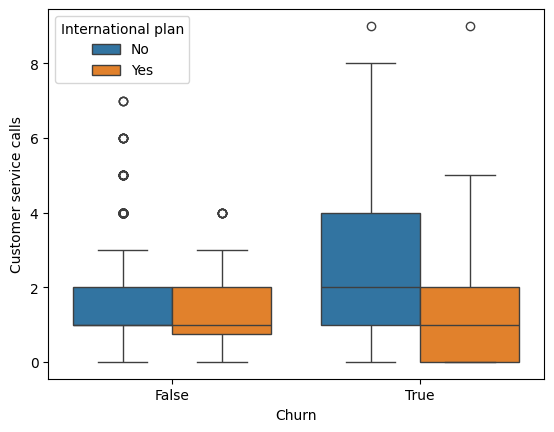

In [24]:
# Create the box plot 
sns.boxplot(x = 'Churn', 
			y = 'Customer service calls', 
			data = dataset, 
			hue = "International plan") 
# Display the plot 
plt.show() 

## Data Preprocessing for Telco Churn Dataset
### Many Machine Learning models make certain assumptions about how the data is distributed. Some of the assumptions are as follows:

##### The features are normally distributed
##### The features are on the same scale
##### The datatypes of features are numeric
##### In telco churn data, Churn, Voice mail plan, and, International plan, in particular, are binary features that can easily be converted into 0’s and 1’s.


In [30]:
# Features and Labels 
X = dataset.iloc[:, 0:19].values 
y = dataset.iloc[:, 19].values # Churn 

# Encoding categorical data in X 
from sklearn.preprocessing import LabelEncoder 

labelencoder_X_1 = LabelEncoder() 
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3]) 

labelencoder_X_2 = LabelEncoder() 
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4]) 

# Encoding categorical data in y 
labelencoder_y = LabelEncoder() 
y = labelencoder_y.fit_transform(y) 


## Code: Encoding State feature using One hot encoding

In [31]:
# Removing extra column to avoid dummy variable trap 
X_State = pd.get_dummies(X[:, 0], drop_first = True) 

# Converting X to a dataframe 
X = pd.DataFrame(X) 

# Dropping the 'State' column 
X = X.drop([0], axis = 1) 

# Merging two dataframes 
frames = [X_State, X] 
result = pd.concat(frames, axis = 1, ignore_index = True) 

# Final dataset with all numeric features 
X = result 

## Code : To Create Training and Test sets

In [32]:
# Splitting the dataset into the Training and Test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
													test_size = 0.2, 
													random_state = 0) 

## Code: To scale features of the training and test sets

In [33]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test) 

## Code: To train a Random Forest classifier model on the training set.

In [39]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Instantiate the classifier 
clf = RandomForestClassifier() 

# Fit to the training data 
clf.fit(X_train, y_train) 


RandomForestClassifier()

## Code : Making Predictions

In [40]:
# Predict the labels for the test set 
y_pred = clf.predict(X_test) 

## Code: Evaluating Model Performance

In [41]:
# Compute accuracy 
from sklearn.metrics import accuracy_score 

accuracy_score(y_test, y_pred)

0.9456928838951311

## Code : Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred)) 

[[463   2]
 [ 27  42]]


From the confusion matrix, we can compute the following metrics:

True Positives(TP) = 
True Negatives(TN) = 
False Positives(FP) =
False Negatives(FN) = 
Precision = TP/(TP+FP) = 
Recall = TP/(TP+FN) = 
Accuracy = (TP+TN)/(TP+TN+FP+FN) = 
